In [1]:
import warnings
warnings.filterwarnings('ignore')

# Random Forest & Ansemble(Clone Coding Iris data)

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from IPython.display import Image

In [3]:
iris = datasets.load_iris()
print('아이리스 종류 :', iris.target_names)
print('target : [0:setosa, 1:versicolor, 2:virginica]')
print('데어터 수 :', len(iris.data))
print('데이터 열 이름 :', iris.feature_names)
 
# iris data Dataframe으로
data = pd.DataFrame(
    {
    'sepal length': iris.data[:, 0],
    'sepal width': iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width': iris.data[:, 3],
    'species': iris.target
    }
)
data.head()

아이리스 종류 : ['setosa' 'versicolor' 'virginica']
target : [0:setosa, 1:versicolor, 2:virginica]
데어터 수 : 150
데이터 열 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

# 테스트 데이터 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

105
45
105
45


In [5]:
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
# 예측
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))

[2 1 1 2 1 2 2 1 0 1 2 0 2 1 0 0 1 0 0 1 0 1 1 2 2 2 0 1 0 0 0 1 0 1 1 2 1
 1 1 0 0 1 2 1 0]
[2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 0]


In [7]:
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.9111111111111111


# Random Forest & Ansemble(Regression )

![Ansemble](imgs/Ansemble.png)
[참고사항](https://ebbnflow.tistory.com/133)

# Train Data

In [8]:
train = pd.read_csv("train.csv")

In [9]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
x_train = train.drop("price_range", axis = 1)
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [13]:
y_train = train["price_range"]
for i in range(len(y_train)):
    if y_train[i] == 0:
        y_train[i] = "Low Cost"
    elif y_train[i] == 1:
        y_train[i] = "Medium Cost"
    else:
        y_train[i] = "Very High Cost"
y_train

0          Medium Cost
1       Very High Cost
2       Very High Cost
3       Very High Cost
4          Medium Cost
             ...      
1995          Low Cost
1996    Very High Cost
1997    Very High Cost
1998          Low Cost
1999    Very High Cost
Name: price_range, Length: 2000, dtype: object

# Test Data

In [14]:
test = pd.read_csv("train.csv")

In [15]:
x_test = test.drop("price_range", axis = 1)
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [16]:
y_test = test["price_range"]
for i in range(len(y_test)):
    if y_test[i] == 0:
        y_test[i] = "Low Cost"
    elif y_test[i] == 1:
        y_test[i] = "Medium Cost"
    else:
        y_test[i] = "Very High Cost"
y_test

0          Medium Cost
1       Very High Cost
2       Very High Cost
3       Very High Cost
4          Medium Cost
             ...      
1995          Low Cost
1996    Very High Cost
1997    Very High Cost
1998          Low Cost
1999    Very High Cost
Name: price_range, Length: 2000, dtype: object

# GridSearch CV를 통한 랜덤포레스트 하이퍼파라미터 튜닝

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [18]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [19]:
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9100


In [20]:
best_param_clf = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 10,
                                min_samples_leaf = 8,
                                min_samples_split = 20,
                                n_jobs = -1)

In [21]:
best_param_clf.fit(x_train, y_train)
prediction = best_param_clf.predict(x_test)
print("예측 정확도: {:.4f}".format(accuracy_score(y_test, prediction)))

예측 정확도: 0.9660


# Random Forest의 각 특성 중요도 시각화

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

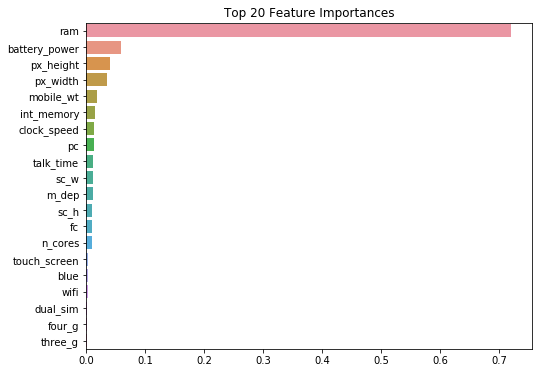

In [23]:
ftr_importances_values = best_param_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [24]:
from sklearn.tree import export_graphviz

In [25]:
model = RandomForestClassifier()
model.fit(x_train, y_train)


estimator = model.estimators_[3]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = x_train.columns,
                class_names = y_train.unique(),
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

In [33]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot','-o', 'tree.png', '-Gdpi=600'])

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [34]:
# Display in jupyter notebook
from IPython.display import Image

In [35]:
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'